# Preprocessed Data

In [44]:
# retrieve the preprocessed data from previous notebook

%store -r x_train 
%store -r x_test 
%store -r y_train 
%store -r y_test 
%store -r Y
%store -r le

In [45]:
x_train.shape

(6985, 40, 174)

# CNN

## Model Design

In [46]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = Y.shape[1]
filter_size = 2

# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax'))

## Model Compilation

In [47]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [48]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 19, 86, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 41, 64)        

## Training

In [49]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 72
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 6985 samples, validate on 1747 samples
Epoch 1/72
6985/6985 [==============================] - 48s 7ms/step - loss: 1.7856 - accuracy: 0.4110 - val_loss: 1.3341 - val_accuracy: 0.5655

Epoch 00001: val_loss improved from inf to 1.33414, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 2/72
6985/6985 [==============================] - 46s 7ms/step - loss: 1.1814 - accuracy: 0.5921 - val_loss: 1.1112 - val_accuracy: 0.6514

Epoch 00002: val_loss improved from 1.33414 to 1.11125, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 3/72
6985/6985 [==============================] - 48s 7ms/step - loss: 1.0080 - accuracy: 0.6442 - val_loss: 1.0786 - val_accuracy: 0.6216

Epoch 00003: val_loss improved from 1.11125 to 1.07858, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 4/72
6985/6985 [==============================] - 46s 7ms/step - loss: 0.8669 - accuracy: 0.7025 - val_loss: 0.8375 - val_accuracy: 0.7161

Epoch 00004: val_loss improved fr

6985/6985 [==============================] - 46s 7ms/step - loss: 0.1720 - accuracy: 0.9394 - val_loss: 0.2970 - val_accuracy: 0.9004

Epoch 00037: val_loss did not improve from 0.27321
Epoch 38/72
6985/6985 [==============================] - 46s 7ms/step - loss: 0.1826 - accuracy: 0.9357 - val_loss: 0.3213 - val_accuracy: 0.9021

Epoch 00038: val_loss did not improve from 0.27321
Epoch 39/72
6985/6985 [==============================] - 46s 7ms/step - loss: 0.1609 - accuracy: 0.9450 - val_loss: 0.2936 - val_accuracy: 0.9170

Epoch 00039: val_loss did not improve from 0.27321
Epoch 40/72
6985/6985 [==============================] - 47s 7ms/step - loss: 0.1516 - accuracy: 0.9485 - val_loss: 0.2795 - val_accuracy: 0.9239

Epoch 00040: val_loss did not improve from 0.27321
Epoch 41/72
6985/6985 [==============================] - 46s 7ms/step - loss: 0.1666 - accuracy: 0.9439 - val_loss: 0.2678 - val_accuracy: 0.9141

Epoch 00041: val_loss improved from 0.27321 to 0.26783, saving model to s

## Testing the model

In [50]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
accuracy = 100*score[1]
print("Training Accuracy: %.4f%%" % accuracy)

score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
print("Testing Accuracy: %.4f%%" % accuracy)

Training Accuracy: 99.1553%
Testing Accuracy: 93.1311%


## Plotting the trained model 

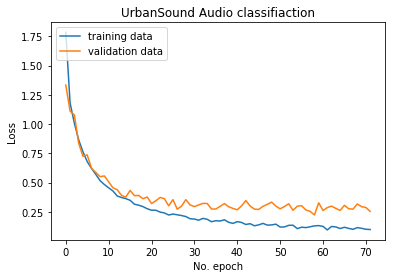

In [51]:
# Plot history: 
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('UrbanSound Audio classifiaction')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()